# <div align="center">  Predicting College Football Players Careers Length <br>From Their Performance in College<br>(before the day of the draft) </div>

In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

Getting all the picks of the NFL draft since 1970 till 2021

In [2]:
# https://www.kaggle.com/cviaxmiwnptr/nfl-draft-19702021
df = pd.read_csv('nfl_draft_1970-2021.csv')
df['career_length'] = df['to'] - df['year'] + 1
df = df[['year', 'to','player', 'age', 'career_length']]
df.head()

,year,to,player,age,career_length
0,1970,1983.0,Terry Bradshaw,22.0,14.0
1,1970,1980.0,Mike McCoy,22.0,11.0
2,1970,1981.0,Mike Phipps,22.0,12.0
3,1970,1976.0,Phil Olsen,22.0,7.0
4,1970,1979.0,Al Cowlings,23.0,10.0


<AxesSubplot:>

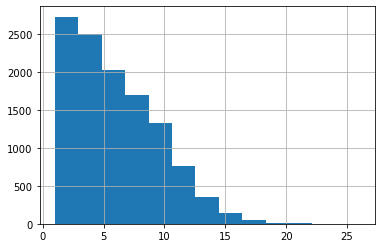

In [3]:
df['career_length'].hist(bins=13)

Let's try to do a random forest regressor to predict the career length

Now we'll pull the stats of all college players between 2005 and 2013

In [4]:
# https://www.kaggle.com/mhixon/college-football-statistics
folder = '/college_stats/'
sum = 0
data = pd.DataFrame()
for file in glob.glob("*/*/player-game-statistics.csv"):
    stats = pd.read_csv(file)
    sum += len(stats)
    data = pd.concat([data, stats], axis=0)

In [5]:
assert len(data) == sum

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503806 entries, 0 to 57326
Data columns (total 58 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Player Code            503806 non-null  int64  
 1   Game Code              503806 non-null  int64  
 2   Rush Att               503806 non-null  int64  
 3   Rush Yard              503806 non-null  int64  
 4   Rush TD                503806 non-null  int64  
 5   Pass Att               503806 non-null  int64  
 6   Pass Comp              503806 non-null  int64  
 7   Pass Yard              503806 non-null  int64  
 8   Pass TD                503806 non-null  int64  
 9   Pass Int               503806 non-null  int64  
 10  Pass Conv              503806 non-null  int64  
 11  Rec                    503806 non-null  int64  
 12  Rec Yards              503806 non-null  int64  
 13  Rec TD                 503806 non-null  int64  
 14  Kickoff Ret            503806 non-nul

No nulls all numeric

for col in data.columns:
    print(col)
    data[data[col]>0][col].hist()
    plt.show()

In [7]:
gb = data.groupby('Player Code').agg(games=('Game Code', 'count'),
                                               rush_att=('Rush Att', 'sum'),
                                               rush_yard=('Rush Yard','sum'),
                                               rush_td=('Rush TD','sum'),
                                               pass_att=('Pass Att','sum'),
                                               pass_comp=('Pass Comp','sum'),
                                               pass_yard=('Pass Yard','sum'),
                                               pass_td=('Pass TD','sum'),
                                               pass_int=('Pass Int','sum'),
                                               pass_conv=('Pass Conv','sum'),
                                               rec=('Rec','sum'),
                                               rec_yards=('Rec Yards','sum'),
                                               rec_td=('Rec TD','sum'),
                                               kickoff_ret=('Kickoff Ret','sum'),
                                               kickoff_ret_yard=('Kickoff Ret Yard','sum'),
                                               kickoff_ret_td=('Kickoff Ret TD','sum'),
                                               punt_ret=('Punt Ret','sum'),
                                               punt_ret_yard=('Punt Ret Yard','sum'),
                                               punt_ret_td=('Punt Ret TD','sum'),
                                               fum_ret=('Fum Ret','sum'),
                                               fum_ret_yard=('Fum Ret Yard','sum'),
                                               fum_ret_td=('Fum Ret TD','sum'),
                                               int_ret=('Int Ret','sum'),
                                               int_ret_yard=('Int Ret Yard','sum'),
                                               int_ret_td=('Int Ret TD','sum'),
                                               misc_ret=('Misc Ret','sum'),
                                               misc_ret_yard=('Misc Ret Yard', 'sum'),
                                               misc_ret_td=('Misc Ret TD', 'sum'),
                                               field_goal_att=('Field Goal Att', 'sum'),
                                               field_goal_made=('Field Goal Made', 'sum'),
                                               off_xp_kick_att=('Off XP Kick Att', 'sum'),
                                               off_xp_kick_made=('Off XP Kick Made', 'sum'),
                                               off_2xp_att=('Off 2XP Att', 'sum'),
                                               off_2xp_made=('Off 2XP Made', 'sum'),
                                               def_2xp_att=('Def 2XP Att', 'sum'),
                                               def_2xp_made=('Def 2XP Made', 'sum'),
                                               safety=('Safety', 'sum'),
                                               points=('Points', 'sum'),
                                               punt=('Punt', 'sum'),
                                               punt_yard=('Punt Yard', 'sum'),
                                               kickoff=('Kickoff', 'sum'),
                                               kickoff_yard=('Kickoff Yard', 'sum'),
                                               kickoff_touchback=('Kickoff Touchback', 'sum'),
                                               kickoff_out_of_bounds=('Kickoff Out-Of-Bounds', 'sum'),
                                               kickoff_onside=('Kickoff Onside', 'sum'),
                                               fumble=('Fumble', 'sum'),
                                               fumble_lost=('Fumble Lost', 'sum'),
                                               tackle_solo=('Tackle Solo', 'sum'),
                                               tackle_assist=('Tackle Assist', 'sum'),
                                               tackle_for_loss=('Tackle For Loss', 'sum'),
                                               tackle_for_loss_yard=('Tackle For Loss Yard', 'sum'),
                                               sack=('Sack', 'sum'),
                                               sack_yard=('Sack Yard', 'sum'),
                                               qb_hurry=('QB Hurry', 'sum'),
                                               fumble_forced=('Fumble Forced', 'sum'),
                                               pass_broken_up=('Pass Broken Up', 'sum'),
                                               kick_or_punt_blocked=('Kick/Punt Blocked', 'sum'))

# https://www.kaggle.com/mhixon/college-football-statistics
folder = '/college_stats/'
sum = 0
players = pd.DataFrame()
for file in glob.glob("*/*/player.csv"):
    players_temp = pd.read_csv(file)
    sum += len(players_temp)
    players = pd.concat([players, players_temp], axis=0)
    
players['name'] = players['First Name'] + ' ' + players['Last Name']

gb = gb.merge(players, left_index=True, right_on=['Player Code'])
gb = gb.set_index('name')
gb = gb.drop_duplicates()

for col in gb.describe().columns:
    print(col)
    gb[gb[col]>0][col].hist()
    plt.show()

In [8]:
gb = gb.merge(df,left_index=True, right_on='player', how='inner').set_index('player')
gb = gb.drop_duplicates()

for col in gb.columns:
    print(col)
    gb[gb[col]>0][col].hist()
    plt.show()

In [9]:
gb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15606 entries, Mark Merrill to Denzel Ward
Data columns (total 74 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   games                  15606 non-null  int64  
 1   rush_att               15606 non-null  int64  
 2   rush_yard              15606 non-null  int64  
 3   rush_td                15606 non-null  int64  
 4   pass_att               15606 non-null  int64  
 5   pass_comp              15606 non-null  int64  
 6   pass_yard              15606 non-null  int64  
 7   pass_td                15606 non-null  int64  
 8   pass_int               15606 non-null  int64  
 9   pass_conv              15606 non-null  int64  
 10  rec                    15606 non-null  int64  
 11  rec_yards              15606 non-null  int64  
 12  rec_td                 15606 non-null  int64  
 13  kickoff_ret            15606 non-null  int64  
 14  kickoff_ret_yard       15606 non-null  int

In [10]:
gb[gb['career_length'].isna()]

,games,rush_att,rush_yard,rush_td,pass_att,pass_comp,pass_yard,pass_td,pass_int,pass_conv,...,Height,Weight,Home Town,Home State,Home Country,Last School,year,to,age,career_length
player,,,,,,,,,,,,,,,,,,,,,
Tyler Reed,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2006,NaN,NaN,NaN
Tyler Reed,12,13,60,0,0,0,0,0,0,0,...,71.0,220.0,Holt,MI,US,Holt HS,2006,NaN,NaN,NaN
Tyler Reed,12,13,60,0,0,0,0,0,0,0,...,71.0,206.0,Holt,MI,US,Holt HS,2006,NaN,NaN,NaN
Tyler Reed,12,13,60,0,0,0,0,0,0,0,...,71.0,215.0,Holt,MI,US,Holt HS,2006,NaN,NaN,NaN
Tyler Reed,12,13,60,0,0,0,0,0,0,0,...,71.0,217.0,Holt,MI,US,Holt HS,2006,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Aaron Jackson,4,0,0,0,0,0,0,0,0,0,...,75.0,185.0,Frankfort,KY,US,Frankfort High,1984,NaN,NaN,NaN
Keion Adams,10,0,0,0,0,0,0,0,0,0,...,75.0,230.0,Salisbury,NC,US,Salisbury,2017,NaN,22.0,NaN
Jay Anderson,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1972,NaN,NaN,NaN


In [11]:
len(gb)

15606